In [82]:
import  pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, reshape, zeros, append, arange
import math
from math import log, e, pi
import numpy
from sys import argv

 #### Total Energies in eV

In [83]:
E0=-3324932.942491689 # pristine
E1=-3335811.405118595 # addon S
E2=-3314050.981984572 # mono S vacancy
E3=-3303169.531834886 # di S vacancy up&down
E4=-3303169.508929158 # di S vacancy neighboring
E5=-3213688.902122602 # mono Mo vacancy
E_MoS2=-132997.116189474 # primtitive
mu_MoS2=E0/75

### For S8 ring

In [84]:
ES8=-87031.346957    #8 atoms in unitcell
mu_S8=ES8/8
#print(mu_S8)

### For Mo BCC Bulk

In [85]:
EMo=-222473.348568306  # Total energy in eV
mu_Mobcc=EMo/2

# Calculation of $\mu_S$ on full temperature Range

In [86]:
p0=1e+06  # 
k=1.380649e-16
h=6.62607015e-27
hbar=1.054571817e-27
sigma=8
pi=3.14159265359
m=4.258952992e-22
IA=1.314051643394595e-37
IB=1.314146807283309e-37
IC=2.42660958899724e-37
R=8.31446261815324
convert=29979245800.0*2*pi #cm^-1 to Hz

## $$\mu=   \mu_{0}+ kT \ln\frac{p}{p_{0}}+ E_{DFT}+ \sum_{i}\frac{\hbar \omega_{i}}{2}$$

## $$  \mu_{0}=R\ln\frac{Z^{0}}{V} \frac{kT}{p_{0}} = -kT\ln [(\frac{2 \pi m }{ h^{2}})^{\frac{3}{2}}\frac{(kT)^{\frac{5}{2}}}{p_{0}}]- kT \ln(\frac{\pi^{\frac{1}{2}}}{\sigma})+ \\ 
    -kT \ln ((\frac{8 \pi kT}{h^{2}})^{\frac{3}{2}}I_{A}^{\frac{1}{2}} I_{B}^{\frac{1}{2}} I_{C}^{\frac{1}{2}})+kT \sum^{3N-6}_{i} \ln(1-exp(-\beta h \omega_{i})) $$

## $$ A=\ln( \frac{Z^{0}_{trans} kT}{V})=\ln [(\frac{2 \pi m }{ h^{2}})^{\frac{3}{2}}\frac{(kT)^{\frac{5}{2}}}{p_{0}}]= \ln [(2 \pi m )^{\frac{3}{2}}\frac{(kT)^{\frac{5}{2}}}{h^{3} p_{0}}]$$

In [87]:
A=[]
for T in range(300,4500,100):
    A = np.append(np.log((((2*pi*m)**(3/2))*((k*T)**(5/2)))/(p0*(h**3))),A)

##  $$ B= \ln Z^{0}_{rot}=\ln(\frac{\pi^{\frac{1}{2}}}{\sigma})+ \ln ((\frac{8 \pi kT}{h^{2}})^{\frac{3}{2}}I_{A}^{\frac{1}{2}} I_{B}^{\frac{1}{2}} I_{C}^{\frac{1}{2}})$$

In [88]:
B=[]
for T in range(300,4500,100):
    I=np.sqrt(IA)*np.sqrt(IB)*np.sqrt(IC)
    B=np.append(np.log(np.sqrt(pi)/sigma)+ np.log((((8*pi*k*T)/(h**2))**(3/2))*I),B)

## $$ C=\ln Z^{0}_{vib}= -\sum^{3N-6}_{i} \ln(1-exp(-\frac{ \hbar \omega_{i}}{kT}))$$

In [89]:
C=[]
w=[2.10968990e-01, 7.42646474e+01, 7.43325628e+01, 1.36225482e+02,
 1.36290076e+02, 1.85771263e+02, 1.85786796e+02, 2.12035325e+02,
 2.28606326e+02, 2.45210844e+02, 2.45241312e+02, 3.56870108e+02,
 3.90002968e+02, 3.90080384e+02, 4.51735833e+02, 4.51793806e+02,
 4.61001272e+02, 4.61044236e+02, 4.70393264e+02]
w=np.array(w)*convert
for T in range(300,4500,100):
    temp=-numpy.array([(np.log(1-math.exp(-(hbar*i)/(k*T)))) for i in w])
    C=np.append(np.sum(temp),C)

## $$\sum_{i}\frac{\hbar \omega_{i}}{2}$$

In [90]:
D=[]
temp=numpy.array([(hbar*i)/(2) for i in w])
D=np.sum(temp)

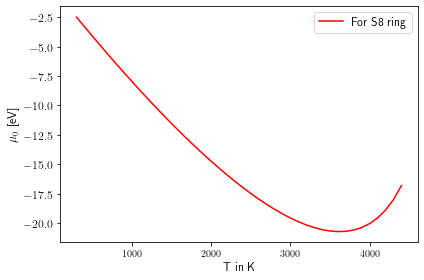

In [91]:
k=8.617333262145e-05 ###########
T=arange(300,4500,100)
mu_0=-k*T*(A+B+C)
plt.plot(T,mu_0, 'red', label='For S8 ring') 
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_0$ [eV]', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('mu0_T.pdf')

## $$ \mu=\mu_{0}+ kT \ln\frac{p}{p_{0}}+ E_{DFT}+ \sum_{i}\frac{\hbar \omega_{i}}{2}$$

In [92]:
E_DFT=-87031.346957 #ev
p=1914.57 # 1.89e-3 atm (atm to cgs * 1013250)
#for p in arange(p0/1e+12,p0):
#    print(k*T*np.log(p/p0))

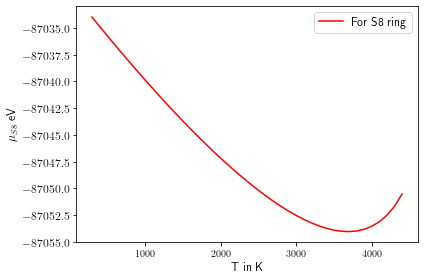

In [93]:
T=arange(300,4500,100)
mu_S8=mu_0 + k*T*np.log(p/p0)+D + E_DFT
plt.plot(T,mu_S8, 'red', label='For S8 ring')
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_{S8}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

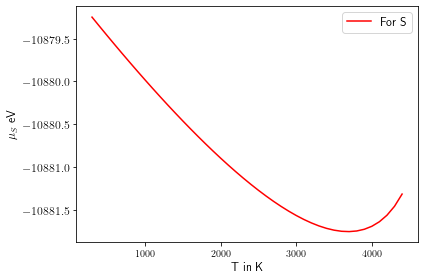

In [94]:
mu_S=mu_S8/8
plt.plot(T,mu_S, 'red', label='For S')
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_S$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muS_T.pdf')

#### Read the frequencies

In [95]:
d0=pd.read_csv('w0', sep='\s+',header=0)
d1=pd.read_csv('addS', sep='\s+',header=0)
d2=pd.read_csv('VS', sep='\s+',header=0)
d3=pd.read_csv('VS2', sep='\s+',header=0)
d4=pd.read_csv('VS22', sep='\s+',header=0)
d5=pd.read_csv('VMo', sep='\s+',header=0)

# cm-1 to Hz
convert=29979245800.0*2*pi #cm^-1 to Hz
hbar=6.582119569e-16 
w0=d0['w0']*convert
w1=d1['addS']*convert
w2=d2['VS']*convert
w3=d3['VS2']*convert
w4=d4['VS22']*convert
w5=d5['VMo']*convert #THZ to Hz



## Free Energy function
## $$ F^{qh}=\sum_{i}^{3N} [\frac{\hbar w_{i}}{2}+kTln[1-\exp{\frac{-
\hbar w_{i}}{kT}}]$$

In [96]:
def free_energy(w):
   F=[]
   k=8.617333262145e-5
   w = numpy.array(w)
   for T in arange(300,4500,100):
      
     temp=numpy.array([(hbar*i/2 + k*T*np.log(1-math.exp(-(hbar*i)/(k*T)))) for i in w])
     F.append(numpy.sum(temp))

   return F


# Calculation of $\mu_{Mo}$ on full temperature Range

#### For Mo BCC bulk
$$ \mu_{Mo}^{BCC}=\frac{1}{2}(E_{DFT}+ PV) + \frac{1}{2} F_{phon}(V,T) $$

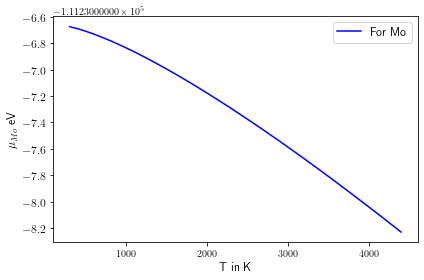

In [101]:
EMo=-222473.348568306  # Total energy in eV
mu_Mobcc=EMo/2

d6=pd.read_csv('Mo_BCC', sep='\s+',header=0)
w=d6['x']*convert # kj/mol to eV
Fphon=free_energy(w)
Fphon=np.array(Fphon)

V= 0.292849E+02 # volume of unitcell A^3
p= 7.329633135876344e-05 # at 2000 k
PV=p*V*6.3242093e-07 # to eV
T=arange(300,4500,100)

mu_Mo=(1/2)*(EMo+PV+Fphon)

plt.plot(T,mu_Mo, 'blue', label='For Mo')
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_{Mo}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muMo_T.pdf')

#### $$\Delta F^{qh}(T)=F^{qh}_{defect}-F^{qh}_{pristine} $$

In [102]:
def DeltaF(A,B):
   deltaF=[]
   F1=free_energy(A)
   F2=free_energy(B)
   zip_object = zip(F1, F2)
   for i, j in zip_object:    
       deltaF.append(i-j)
   return deltaF 


## Equilibirium Concentration function

In [103]:
def conc(r):
   rho=[]
   k=8.617333262145e-05
   for T,i in zip(arange(300,4500,100),r):
 #  for T in arange(100,1010,10):
       temp=math.exp(-i/(k*T))
       rho.append(temp)
   return rho 


## $$ G^{d}_{f}(P,T)=F_{defect}(P,T)-F_{pristine}(P,T)+ P\Delta V - \sum_{i} \Delta n_{i} \mu_{i} $$

In [104]:
addS = [E1-E0-a + b for a, b in zip(mu_S, DeltaF(w1,w0))]
VS = [E2-E0+a + b for a, b in zip(mu_S, DeltaF(w2,w0))]
VS2 = [E3-E0+2*a + b for a, b in zip(mu_S, DeltaF(w3,w0))]
VS22 = [E4-E0+2*a + b for a, b in zip(mu_S, DeltaF(w4,w0))]
VMo = [E5-E0+a + b for a, b in zip(mu_Mo, DeltaF(w5,w0))]

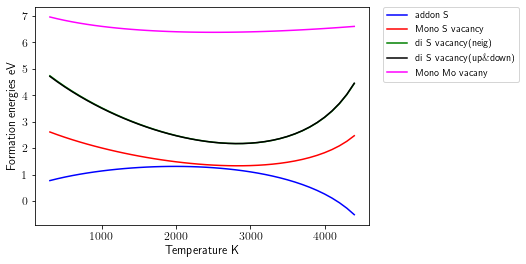

In [134]:
T=arange(300,4500,100)
plt.plot(T, addS, 'b', label='addon S')
plt.plot(T, VS, 'r', label='Mono S vacancy')
plt.plot(T, VS22, 'g', label='di S vacancy(neig)') 
plt.plot(T, VS2, 'k', label=r'di S vacancy(up$\&$down)')
plt.plot(T, VMo, 'magenta', label='Mono Mo vacany') 
plt.xlabel('Temperature K', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

#plt.legend(fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Ef_T.pdf')
plt.show()

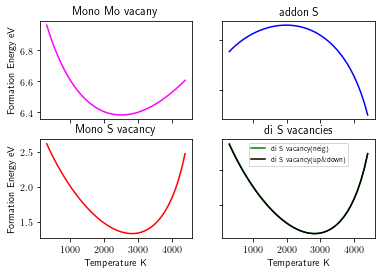

In [135]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(T, VMo, 'magenta', label='Mono Mo vacany')
axs[0, 0].set_title('Mono Mo vacany')
axs[0, 1].plot(T, addS, 'b', label='addon S')
axs[0, 1].set_title('addon S')
axs[1, 0].plot(T, VS, 'r', label='Mono S vacancy')
axs[1, 0].set_title('Mono S vacancy')
axs[1, 1].plot(T, VS22, 'g', label='di S vacancy(neig)')
axs[1, 1].plot(T, VS2, 'k', label=r'di S vacancy(up$\&$down)')
axs[1, 1].set_title('di S vacancies')
axs[1, 1].legend(fontsize=7)

for ax in axs.flat:
    ax.set(xlabel='Temperature K', ylabel='Formation Energy eV')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.savefig('Ef_2_T.pdf')    

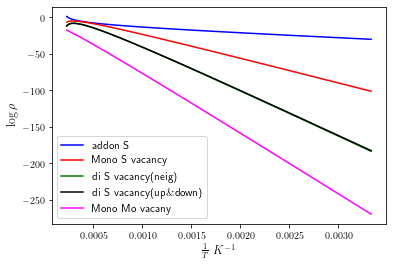

In [138]:
rho1=conc(addS)
rho2=conc(VS)
rho3=conc(VS22)
rho4=conc(VS2)
rho5=conc(VMo)

T=arange(300,4500,100)

plt.plot(1/T,np.log(rho1) , 'b', label='addon S')
plt.plot(1/T, np.log(rho2), 'r', label='Mono S vacancy') 
plt.plot(1/T, np.log(rho3), 'g', label='di S vacancy(neig)') 
plt.plot(1/T, np.log(rho4), 'k', label=r'di S vacancy(up$\&$down)') 
plt.plot(1/T, np.log(rho5), 'magenta', label='Mono Mo vacany') 
plt.xlabel(r'$\frac{1}{T}$ $ K^{-1}$', fontsize=12)
plt.ylabel(r'$\log\rho $', fontsize=12)
plt.legend(fontsize=11)
plt.savefig('logarithm_rho.pdf')  
plt.show()

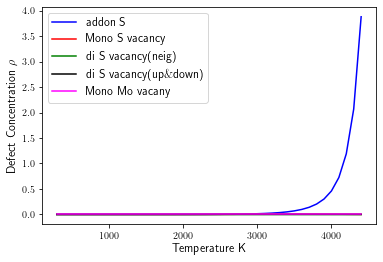

In [141]:
T=arange(300,4500,100)
plt.plot(T,rho1 , 'b', label='addon S')
plt.plot(T, rho2, 'r', label='Mono S vacancy') 
plt.plot(T, rho3, 'g', label='di S vacancy(neig)') 
plt.plot(T, rho4, 'k', label=r'di S vacancy(up$\&$down)') 
plt.plot(T, rho5, 'magenta', label='Mono Mo vacany') 

plt.xlabel('Temperature K', fontsize=12)
plt.ylabel(r'Defect Concentration $\rho$', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('rho_T.pdf')
plt.show()




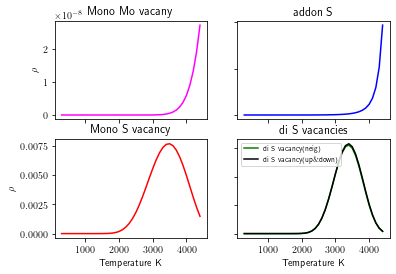

In [143]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(T, rho5, 'magenta', label='Mono Mo vacany')
axs[0, 0].set_title('Mono Mo vacany')
axs[0, 1].plot(T, rho1, 'b', label='addon S')
axs[0, 1].set_title('addon S')
axs[1, 0].plot(T, rho2, 'r', label='Mono S vacancy')
axs[1, 0].set_title('Mono S vacancy')
axs[1, 1].plot(T, rho4, 'g', label='di S vacancy(neig)')
axs[1, 1].plot(T, rho3, 'k', label=r'di S vacancy(up$\&$down)')
axs[1, 1].set_title('di S vacancies')
axs[1, 1].legend(fontsize=7)

for ax in axs.flat:
    ax.set(xlabel='Temperature K', ylabel=r'$\rho$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.savefig('rho_2_T.pdf') 